In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [27]:
df_us = pd.read_csv('usa_county_wise.csv')
df_us.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [28]:
df_us.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed',
       'Deaths'],
      dtype='object')

In [18]:
df_us2 = df_us[['Province_State','Confirmed','Deaths']].sort_values(by=['Confirmed','Deaths'], ascending = False)
df_us2.head(20)

,Province_State,Confirmed,Deaths
626520,New York,224051,23500
623180,New York,223761,23485
619840,New York,223532,23476
616500,New York,223192,23465
613160,New York,222832,23463
609820,New York,222444,23428
606480,New York,222094,23424
603140,New York,221703,23411
599800,New York,221419,23400
596460,New York,221121,23388


In [19]:
df_us2.shape

(627920, 3)

In [20]:
df_us2.isnull().sum()

Province_State    0
Confirmed         0
Deaths            0
dtype: int64

In [21]:
states=list({i for i in df_us['Province_State'].values})
states

['Georgia',
 'Hawaii',
 'Diamond Princess',
 'Northern Mariana Islands',
 'Pennsylvania',
 'New Jersey',
 'Wyoming',
 'Mississippi',
 'Ohio',
 'Tennessee',
 'Alaska',
 'Maryland',
 'New Hampshire',
 'Idaho',
 'Iowa',
 'California',
 'Indiana',
 'Kansas',
 'Louisiana',
 'Minnesota',
 'Washington',
 'West Virginia',
 'Missouri',
 'Vermont',
 'Delaware',
 'Michigan',
 'Oklahoma',
 'Montana',
 'District of Columbia',
 'Florida',
 'Massachusetts',
 'Nevada',
 'Oregon',
 'South Dakota',
 'Utah',
 'Illinois',
 'North Dakota',
 'Kentucky',
 'Puerto Rico',
 'Arizona',
 'New York',
 'North Carolina',
 'Virgin Islands',
 'South Carolina',
 'Nebraska',
 'Arkansas',
 'Virginia',
 'American Samoa',
 'Rhode Island',
 'Grand Princess',
 'Guam',
 'Maine',
 'Colorado',
 'Wisconsin',
 'New Mexico',
 'Texas',
 'Alabama',
 'Connecticut']

In [22]:
df_arr = np.asanyarray(df_us2)
df_arr

array([['New York', 224051, 23500],
       ['New York', 223761, 23485],
       ['New York', 223532, 23476],
       ...,
       ['West Virginia', 0, 0],
       ['Wisconsin', 0, 0],
       ['Wyoming', 0, 0]], dtype=object)

In [23]:
l1=[]
for i in states:
    confirmed, death = 0,0
    
    for j in df_arr:
        if j[0] == i:
            confirmed += j[1]
            death += j[2]
    l1.append([i,confirmed,death])
print(l1)    

[['Georgia', 6859759, 222262], ['Hawaii', 92930, 2003], ['Diamond Princess', 6511, 0], ['Northern Mariana Islands', 2741, 230], ['Pennsylvania', 8096993, 537261], ['New Jersey', 16506714, 1221339], ['Wyoming', 120404, 212], ['Mississippi', 2124940, 81848], ['Ohio', 4275663, 222951], ['Tennessee', 3550017, 47601], ['Alaska', 85686, 3999], ['Maryland', 5393907, 254828], ['New Hampshire', 471598, 25438], ['Idaho', 565768, 12980], ['Iowa', 2231209, 57245], ['California', 17618695, 481757], ['Indiana', 3792618, 200183], ['Kansas', 1188588, 38359], ['Louisiana', 5383429, 285084], ['Minnesota', 2637428, 107860], ['Washington', 2892060, 124895], ['West Virginia', 260095, 9042], ['Missouri', 1842504, 84491], ['Vermont', 120956, 5812], ['Delaware', 962637, 37494], ['Michigan', 6690544, 576093], ['Oklahoma', 1106729, 35470], ['Montana', 102564, 2265], ['District of Columbia', 877997, 45014], ['Florida', 12657802, 292541], ['Massachusetts', 9874030, 666157], ['Nevada', 1508128, 45082], ['Oregon', 

In [29]:
df_us3 = pd.DataFrame(columns = ['Province/State','Confirmed','Death'] ,data = l1)
df_us3

,Province/State,Confirmed,Death
0,Georgia,6859759,222262
1,Hawaii,92930,2003
2,Diamond Princess,6511,0
3,Northern Mariana Islands,2741,230
4,Pennsylvania,8096993,537261
5,New Jersey,16506714,1221339
6,Wyoming,120404,212
7,Mississippi,2124940,81848
8,Ohio,4275663,222951
9,Tennessee,3550017,47601


In [56]:
df_us3_confirmed = df_us3.sort_values(by=['Confirmed'],ascending=False)
df_us3_death = df_us3.sort_values(by=['Death'],ascending=False)
df_us3_confirmed_and_death = df_us3.sort_values(by=['Confirmed','Death'],ascending=False)

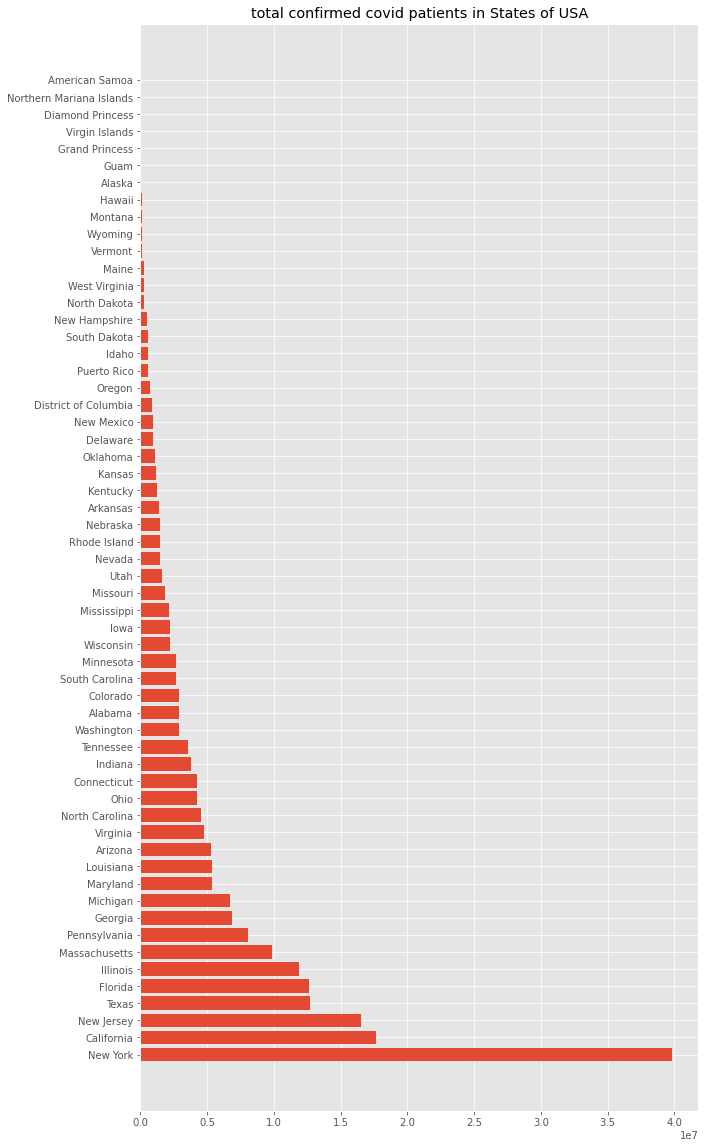

In [147]:
plt.figure(figsize=(10,20))
plt.barh(
         df_us3_confirmed['Province/State'],
        df_us3_confirmed['Confirmed'])
plt.title(label='total confirmed covid patients in States of USA')

plt.show()

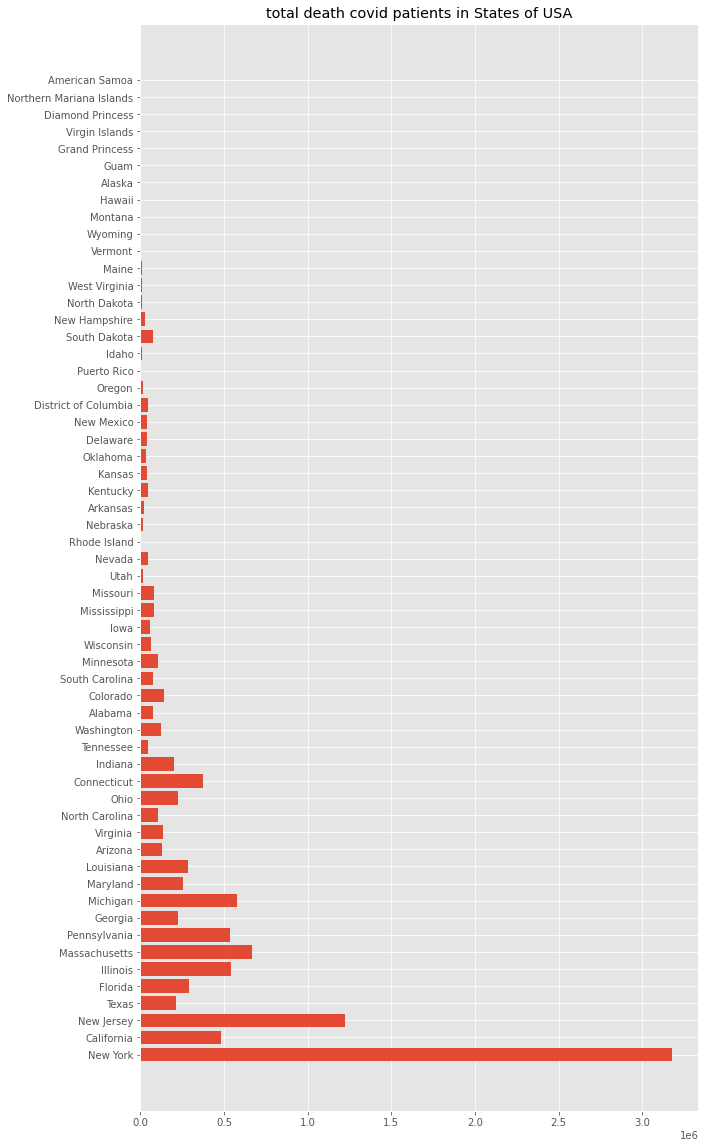

In [146]:
plt.figure(figsize=(10,20))
plt.barh(
         df_us3_confirmed['Province/State'],
        df_us3_confirmed['Death'])
plt.title(label='total death covid patients in States of USA')

plt.show()

224345948 11011411


Text(0.5, 1.0, 'Total patients Confirmed vs Death')

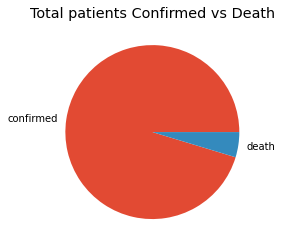

In [73]:
series_conf = pd.Series(df_us3_confirmed_and_death['Confirmed'])
series_death = pd.Series(df_us3_confirmed_and_death['Death'])
conf_sum, death_sum = 0,0
for i in series_conf:
    conf_sum += i
for j in series_death:
    death_sum += j
    
print(conf_sum, death_sum)
plt.pie([conf_sum, death_sum],labels=['confirmed', 'death'])
plt.title("Total patients Confirmed vs Death")

In [74]:
df_us3_confirmed_and_death.shape

(58, 3)

Confirmed patients vs Death patient for each state 


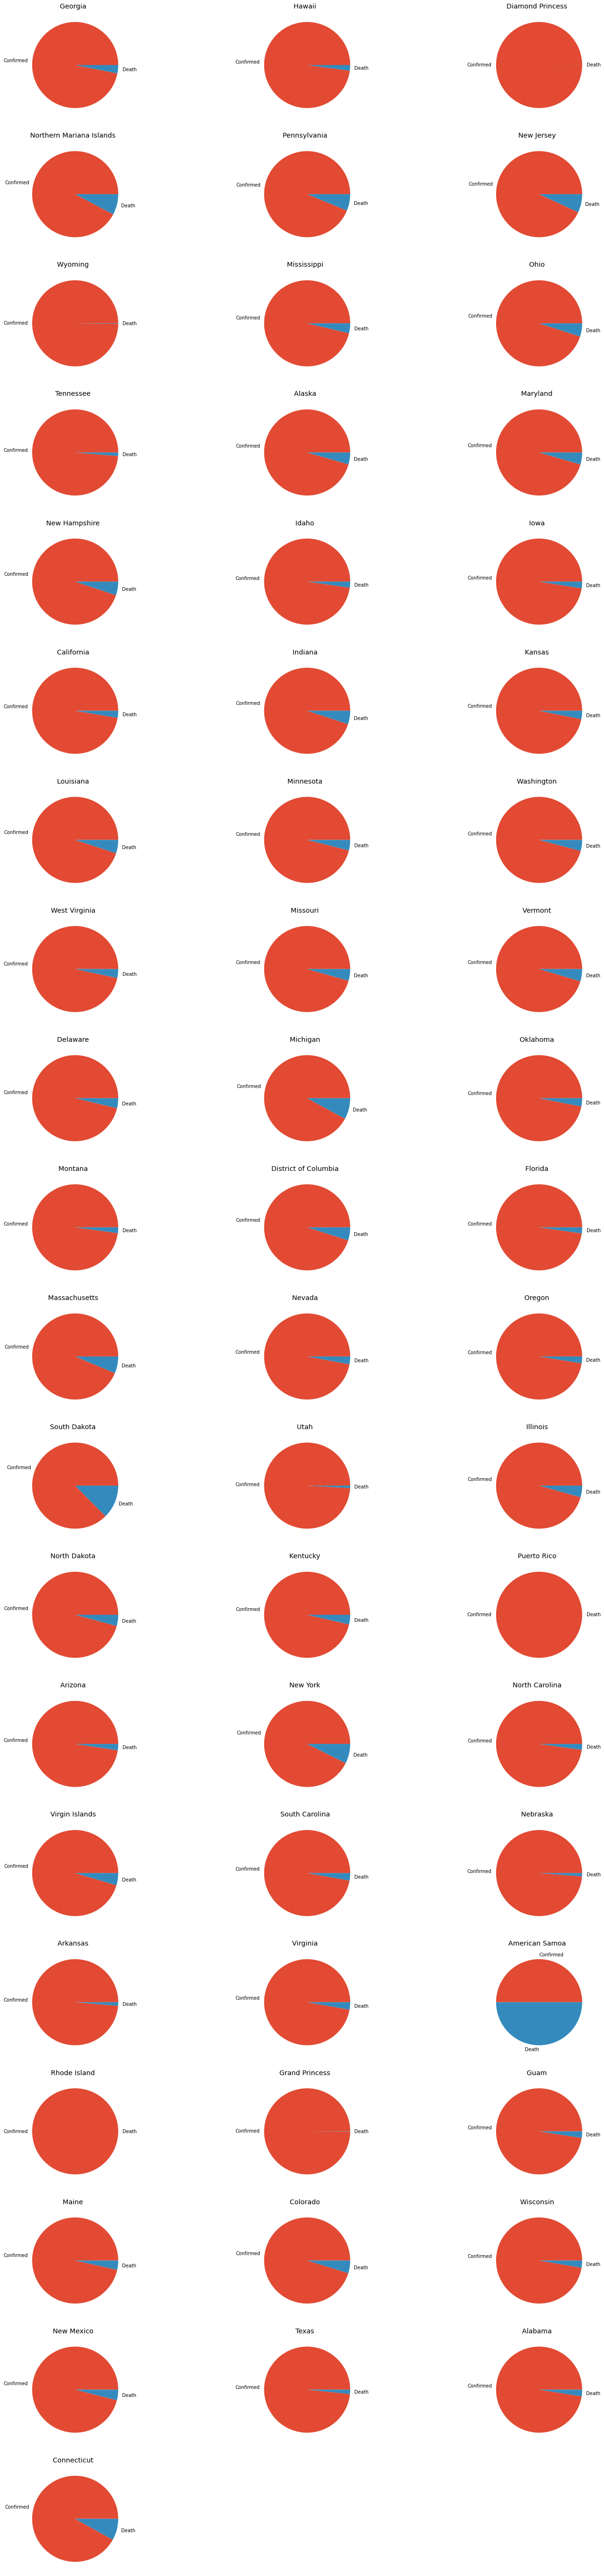

In [157]:

plt.figure(figsize=(25,100))
print("Confirmed patients vs Death patient for each state ")
for i in range(58):
    plt.subplot(20,3,i+1)
    plt.pie(
        [series_conf[i]+1,series_death[i]+1],
        labels = ['Confirmed','Death'],
        radius=1,
        
    )
    
    plt.title(f"{pd.Series(df_us3_confirmed_and_death['Province/State'])[i]}  ")

In [130]:
survival_rate,survival =[],[]
for i in range (len(series_conf)):
    survival_rate.append((series_death[i]/series_conf[i])*100)
    survival.append(series_conf[i]-series_death[i])
total_survival_rate = (death_sum/conf_sum)*100
total_survival = conf_sum-death_sum

C:\Users\Shree\AppData\Local\Temp\ipykernel_11664\2944720782.py:3: RuntimeWarning: invalid value encountered in longlong_scalars
  survival_rate.append((series_death[i]/series_conf[i])*100)


<BarContainer object of 3 artists>

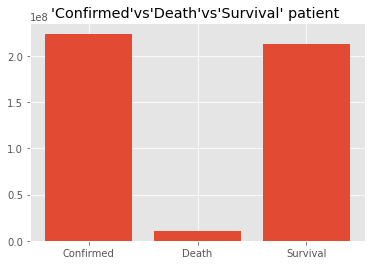

In [139]:
plt.title("'Confirmed'vs'Death'vs'Survival' patient ")
plt.bar(['Confirmed','Death','Survival'],[conf_sum,death_sum,total_survival] )

<BarContainer object of 58 artists>

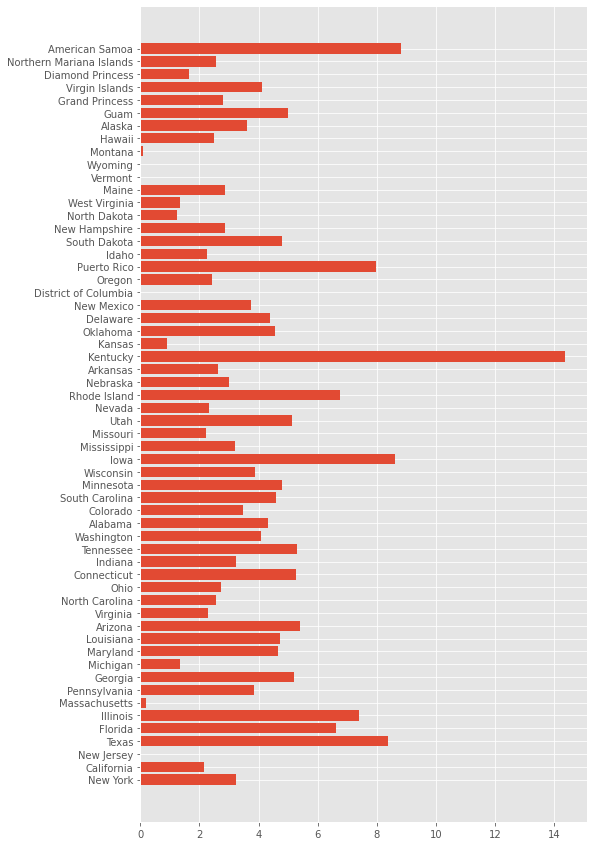

In [143]:
plt.figure(figsize=(8,15))
plt.barh(df_us3_confirmed_and_death['Province/State'],survival_rate)

Confirmed patients vs Death vs survival patient for each state 


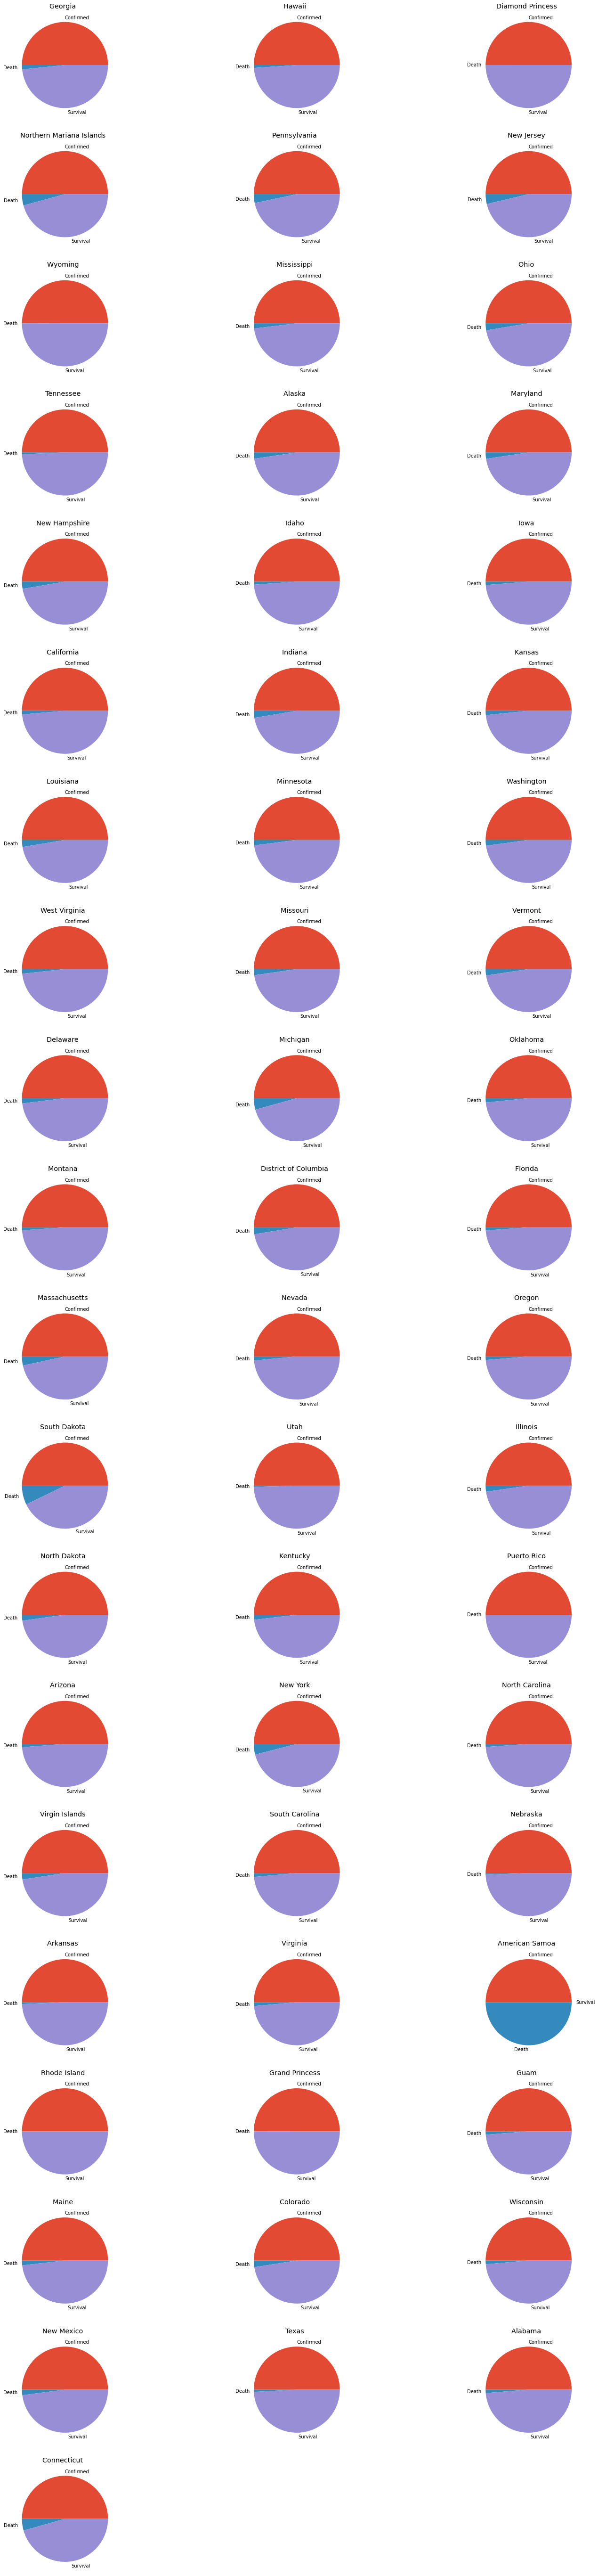

In [156]:

plt.figure(figsize=(25,100))
print("Confirmed patients vs Death vs survival patient for each state ")
for i in range(58):
    plt.subplot(20,3,i+1)
    plt.pie(
        [series_conf[i]+1,series_death[i]+1,survival[i]],
        labels = ['Confirmed','Death','Survival'],
        radius=1,
        
    )
    
    plt.title(f"{pd.Series(df_us3_confirmed_and_death['Province/State'])[i]}  ")